<a href="https://colab.research.google.com/github/said-rasidin/ML_Project/blob/master/MNIST_FASHION_CLASSIFICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras 
print(tf.__version__)
print(keras.__version__)

2.2.0-rc2
2.3.0-tf


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
print(X_train.shape)
print(X_test.shape)

4423680/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


In [0]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, stratify=y_train, test_size=.2)
X_train_norm = X_train / 255.0
X_val_norm = X_val / 255.0

In [5]:
print(X_train_norm.shape)
print(X_val_norm.shape)

(48000, 28, 28)
(12000, 28, 28)


In [7]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
class_names[y_train[0]]

'Ankle boot'

# Model 

In [0]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [11]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train_norm, y_train, epochs=50, validation_data=(X_val_norm, y_val))

Epoch 1/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4980 - accuracy: 0.8213 - val_loss: 0.4275 - val_accuracy: 0.8489
Epoch 2/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3724 - accuracy: 0.8620 - val_loss: 0.4180 - val_accuracy: 0.8443
Epoch 3/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3319 - accuracy: 0.8772 - val_loss: 0.3490 - val_accuracy: 0.8731
Epoch 4/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3093 - accuracy: 0.8859 - val_loss: 0.3201 - val_accuracy: 0.8848
Epoch 5/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2894 - accuracy: 0.8922 - val_loss: 0.3366 - val_accuracy: 0.8835
Epoch 6/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2746 - accuracy: 0.8972 - val_loss: 0.3261 - val_accuracy: 0.8856
Epoch 7/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2644 - accuracy: 0.9004 - val_loss: 0.3158 - val_accuracy:

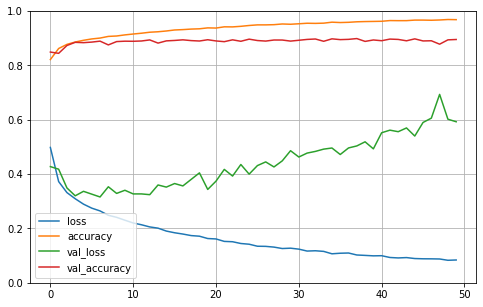

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [14]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 134.3891 - accuracy: 0.8663


[134.3890838623047, 0.8662999868392944]

In [0]:
from sklearn.metrics import confusion_matrix, classification_report

X_test_norm = X_test / 255.0;
y_test_predict = np.argmax(model.predict(X_test_norm), axis=-1)
cm = confusion_matrix(y_test, y_test_predict)

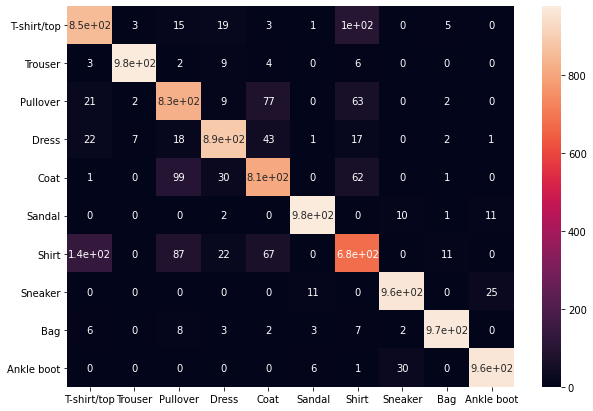

In [48]:
import seaborn as sns

df_cm = pd.DataFrame(cm, index = class_names,
                  columns =  class_names)
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True);

In [49]:
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.82      0.85      0.84      1000
           1       0.99      0.98      0.98      1000
           2       0.78      0.83      0.80      1000
           3       0.90      0.89      0.90      1000
           4       0.80      0.81      0.81      1000
           5       0.98      0.98      0.98      1000
           6       0.72      0.68      0.70      1000
           7       0.96      0.96      0.96      1000
           8       0.98      0.97      0.97      1000
           9       0.96      0.96      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [0]:
model.save("fashion-mnist-model.h5")